Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 2.2) 트위터 API로 연관 키워드 분석하기

### 바로가기

- [<Step1. API 호출> : 트위터 API로 데이터 가져오기](#<Step1.-API-호출>-:-트위터-API로-데이터-가져오기)
    - [API 데이터로 데이터 프레임 생성하기]
- [<Step2. 추출> : 키워드 추출](#<Step2.-추출>-:-키워드-추출)
    - [텍스트 데이터 전처리]
    - [nltk, konlpy를 이용한 키워드 추출]
- [<Step3. 분석> : 연관 분석을 이용한 키워드 분석](#<Step3.-분석>-:-연관-분석을-이용한-키워드-분석)
    - [연관 키워드 추출하기]
    - [단어 빈도 추출하기]
- [<Step4. 시각화> : 연관 키워드 네트워크 시각화](#<Step4.-시각화>-:-연관-키워드-네트워크-시각화)
    - [연관 키워드 네트워크 시각화]

-----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. API 호출> : 트위터 API로 데이터 가져오기

### [API 데이터로 데이터 프레임 생성하기]
- API 사용법 참고 : https://github.com/yoonkt200/python-data-analysis/blob/master/chapter_text/(%EC%B0%B8%EA%B3%A0)%20using-twitter-api.ipynb
- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install tweepy`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [ ]:
!pip install tweepy

-----

##### 트위터 API 가져오기

In [2]:
import tweepy

# 발급 완료된 키를 {your_key} 대신 입력합니다.
CONSUMER_KEY = "{your_key}"
CONSUMER_SECRET = "{your_key}"
ACCESS_TOKEN_KEY = "{your_key}"
ACCESS_TOKEN_SECRET = "{your_key}"

# 개인정보 인증을 요청하는 Handler입니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행합니다.
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비입니다.
api = tweepy.API(auth)

-----

##### '손흥민' 키워드 검색

In [3]:
keyword = "손흥민"
tweets = api.search(keyword)
for tweet in tweets:
    print(tweet.text)
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.created_at)

RT @Haeseul1: ㅋㅋㅋㅋㅋㅋㅋ진짜 손흥민씨 웃음소리ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ끄학학학난리났어ㅠ 나 이걸로 반년 존버가능 https://t.co/kqYWhDY1gq
[{'screen_name': 'Haeseul1', 'name': '[이심만]흥마미🌙', 'id': 1024234028084260865, 'id_str': '1024234028084260865', 'indices': [3, 12]}]
[]
2019-04-07 07:28:53
RT @sportsgkorea: '우리 홍'도 흥해랏 https://t.co/GdMKWGwdUh
[{'screen_name': 'sportsgkorea', 'name': '스포츠니어스', 'id': 756458099506974720, 'id_str': '756458099506974720', 'indices': [3, 16]}]
[]
2019-04-07 07:24:35
- 흥민 의조선수 ( 국대 선수밈들 파요😀 ) 
- 토트넘도 좋아요⚽️

* 진입장벽 엄청 낮아요! 치대주세요:)
* 디엠도 하고 친해지고 싶어요!
* 여기에 흔적 남겨주시면 팔로+디엠갈게요

#손흥민… https://t.co/HEEhzP05Ky
[]
[{'text': '손흥민', 'indices': [108, 112]}]
2019-04-07 07:22:12
'우리 홍'도 흥해랏 https://t.co/GdMKWGwdUh
[]
[]
2019-04-07 07:20:27
판빙빙 아이폰9 이현승 비파워
손흥민 골 박지원 김유리 창원 싱크홀
#정품ㅂㅣㅇㅏ그ㄹㅏ판ㅁㅐ
#ㅅㅣ알ㄹㅣ스파는곳

네이버 "비파워"검색 ●

ㅂㅣㅇㅏ그라가격 홈피
er^^% https://t.co/Qqd96wHRYO
[]
[{'text': '정품ㅂㅣㅇㅏ그ㄹㅏ판ㅁㅐ', 'indices': [38, 51]}, {'text': 'ㅅㅣ알ㄹㅣ스파는곳', 'indices': [52, 62]}]
2019-04-07 07:15:32
런닝맨 빅포레스트 민혁 비파워
부산택시파업 손흥민 개인기 kbo 한국

-----

##### 데이터 프레임 형태로 수집

In [3]:
# 크롤링된 데이터를 저장할 데이터 프레임입니다.
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# twitter API를 사용하여 ‘손흥민’이 포함된 100페이지의 트윗들을 크롤링한 뒤, ‘text’, ‘created_at’ 정보를 데이터 프레임으로 저장합니다.
for i in range(1,100):
    print("Get data", str(i/500*100), "% complete..")
    tweets = api.search(keyword)
    for tweet in tweets:
        tweet_text = tweet.text
        created = tweet.created_at
        row = [created, tweet_text]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
print("Get data 100 % complete..")

In [5]:
df.to_csv("tweet_temp.csv", index=False)

-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]

In [6]:
df = pd.read_csv("tweet_temp.csv")
df.head()

,created,tweet_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...


In [7]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [8]:
# ‘tweet_text’ 피처에 이를 적용합니다.
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...


-----

### [konlpy를 이용한 키워드 추출]

In [9]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [10]:
# ‘ko_text’ 피처에 이를 적용합니다.
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(525, 4)


,created,tweet_text,ko_text,nouns
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,,[]
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스,"[트릴, 리온, 축구, 국가대표, 손흥민, 선수, 샴푸, 모델, 기용, 출처, 한국..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...,"[손흥민, 말씀]"
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민,[손흥민]
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...,"[경남, 도민, 일보, 프로축구, 연맹, 경기장, 선거운동, 손흥민, 영국, 관중,..."


-----

# <Step3. 분석> : 연관 분석을 이용한 키워드 분석

### [연관 키워드 추출하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install apriori apyori`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [ ]:
!pip install apriori apyori

##### 연관 분석 연습

In [11]:
from apyori import apriori

# 장바구니 형태의 데이터(트랜잭션 데이터)를 생성합니다.
transactions = [
    ['손흥민', '시소코'],
    ['손흥민', '케인'],
    ['손흥민', '케인', '포체티노']
]

# 연관 분석을 수행합니다.
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0), Or

In [12]:
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 (손흥민, 케인) 처럼 규칙의 크기가 2 이하인 규칙을 추출합니다.
list(apriori(transactions,
             min_support=0.5,
             min_confidence=0.6,
             min_lift=1.0,
             max_length=2))

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'손흥민', '케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

-----

##### 트위터 연관 키워드 분석

In [13]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
print(transactions)

[['트릴', '리온', '축구', '국가대표', '손흥민', '선수', '샴푸', '모델', '기용', '출처', '한국', '경제', '네이버', '뉴스'], ['손흥민', '말씀'], ['손흥민'], ['경남', '도민', '일보', '프로축구', '연맹', '경기장', '선거운동', '손흥민', '영국', '관중', '인종차별', '행위', '보고', '축구장', '선거운동', '규정', '위반', '이야기'], ['선택', '손흥민', '축구'], ['토트넘', '골수팬', '승부사', '제일', '선수', '손흥민', '입다'], ['계정', '지기', '실수', '삭제', '다시', '하리보', '손흥민', '홍보', '모델', '발탁', '기념', '해당', '추첨', '통해', '하리보', '골드바', '기간'], ['안녕하십니까', '손흥민', '트위터', '매우', '오늘', '경기도', '관심'], ['계정', '지기', '실수', '삭제', '다시', '하리보', '손흥민', '홍보', '모델', '발탁', '기념', '해당', '추첨', '통해', '하리보', '골드바', '기간'], ['출국', '손흥민'], ['출국', '손흥민'], ['한국', '축구', '국가대표팀', '조현우', '손흥민', '황의조', '선수', '아시아', '게임', '금메달', '조현우', '손흥민', '황의조', '금메달', '모습', '의조', '진짜'], ['한국', '축구', '국가대표팀', '조현우', '손흥민', '황의조', '선수', '아시아', '게임', '금메달', '조현우', '손흥민', '황의조', '금메달', '모습', '의조', '진짜'], ['긴급', '속보', '하리보', '신제품', '손흥민', '개시', '하리보', '신제품', '샤인', '가장', '먼저', '보고', '팔로우', '알림', '설정', '두기', '하리보', '신제품'], ['트릴', '리온', '축구', '국가대표', '손흥민', '선수', '샴푸', '

In [14]:
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
                       min_support=0.1,
                       min_confidence=0.2,
                       min_lift=5,
                       max_length=2))
print(results)

114
[RelationRecord(items=frozenset({'게임', '국가대표팀'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'국가대표팀'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'국가대표팀'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)]), RelationRecord(items=frozenset({'금메달', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'금메달'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'금메달'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)]), RelationRecord(items=frozenset({'모습', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'모습'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'모습'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)]), RelationRecord(items=frozenset({'아시아', '게임'}), support=0.14285714285714285

In [15]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,게임,국가대표팀,0.142857
1,금메달,게임,0.142857
2,모습,게임,0.142857
3,아시아,게임,0.142857
4,게임,의조,0.142857


-----

### [단어 빈도 추출하기]

##### 말뭉치 추출

In [16]:
# 말뭉치를 추출합니다.
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

             트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 귀여워 손흥민   경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 관중이 인종차별 행위를 한 것과 같은 급으로 보고 있다 그만큼 축구장 내 선거운동 규정 위반이 엄격하다는 이야기인데요 내가 선택을 받지 않았더라면 손흥민보다 축구를 잘했었을까안녕하세요 토트넘 골수팬 렙 승부사입니다 제일 좋아하는 선수는 손흥민입다   계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간  안녕하십니까 손흥민입니다 오랜만에 트위터에 들어오니 매우 어색하네요오늘 경기도 많은 관심 부탁드립니다  계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간   출국손흥민    출국손흥민   한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요 한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요    긴급속보 하리보 신제품이 나온다고 손흥민 이 개시하는 하리보 신제품 썬샤인을 가장 먼저 받아보고 싶다면 팔로우 하고 알림 설정까지 해두기하리보 신제품              트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋ

In [17]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'손흥민': 560, '하리보': 245, '축구': 140, '선수': 140, '조현우': 140, '황의조': 140, '금메달': 140, '모델': 105, '한국': 105, '신제품': 105, '선거운동': 70, '보고': 70, '계정': 70, '지기': 70, '실수': 70, '삭제': 70, '다시': 70, '홍보': 70, '발탁': 70, '기념': 70, '해당': 70, '추첨': 70, '통해': 70, '골드바': 70, '기간': 70, '출국': 70, '국가대표팀': 70, '아시아': 70, '게임': 70, '모습': 70, '의조': 70, '진짜': 70, '트릴': 35, '리온': 35, '국가대표': 35, '샴푸': 35, '기용': 35, '출처': 35, '경제': 35, '네이버': 35, '뉴스': 35, '말씀': 35, '경남': 35, '도민': 35, '일보': 35, '프로축구': 35, '연맹': 35, '경기장': 35, '영국': 35, '관중': 35, '인종차별': 35, '행위': 35, '축구장': 35, '규정': 35, '위반': 35, '이야기': 35, '선택': 35, '토트넘': 35, '골수팬': 35, '승부사': 35, '제일': 35, '입다': 35, '안녕하십니까': 35, '트위터': 35, '매우': 35, '오늘': 35, '경기도': 35, '관심': 35, '긴급': 35, '속보': 35, '개시': 35, '샤인': 35, '가장': 35, '먼저': 35, '팔로우': 35, '알림': 35, '설정': 35, '두기': 35})


-----

##### 단어 빈도 점수 추가

In [18]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다.
node_df.head()

,node,nodesize
2,축구,140
4,손흥민,560
5,선수,140
7,모델,105
10,한국,105


-----

# <Step4. 시각화> : 연관 키워드 네트워크 시각화

### [연관 키워드 네트워크 시각화]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install networkx`
- 혹은 아래의 코드로 라이브러리를 설치합니다.
- networkx 버전 2.3 이하를 설치하는 경우, 아래 코드를 다음과 같이 바꿔주어야 합니다.
    - `sizes = [G.nodes[node]['nodesize']*25 for node in G]` -> `sizes = [G.node[node]['nodesize']*25 for node in G]`

In [ ]:
!pip install networkx

-----

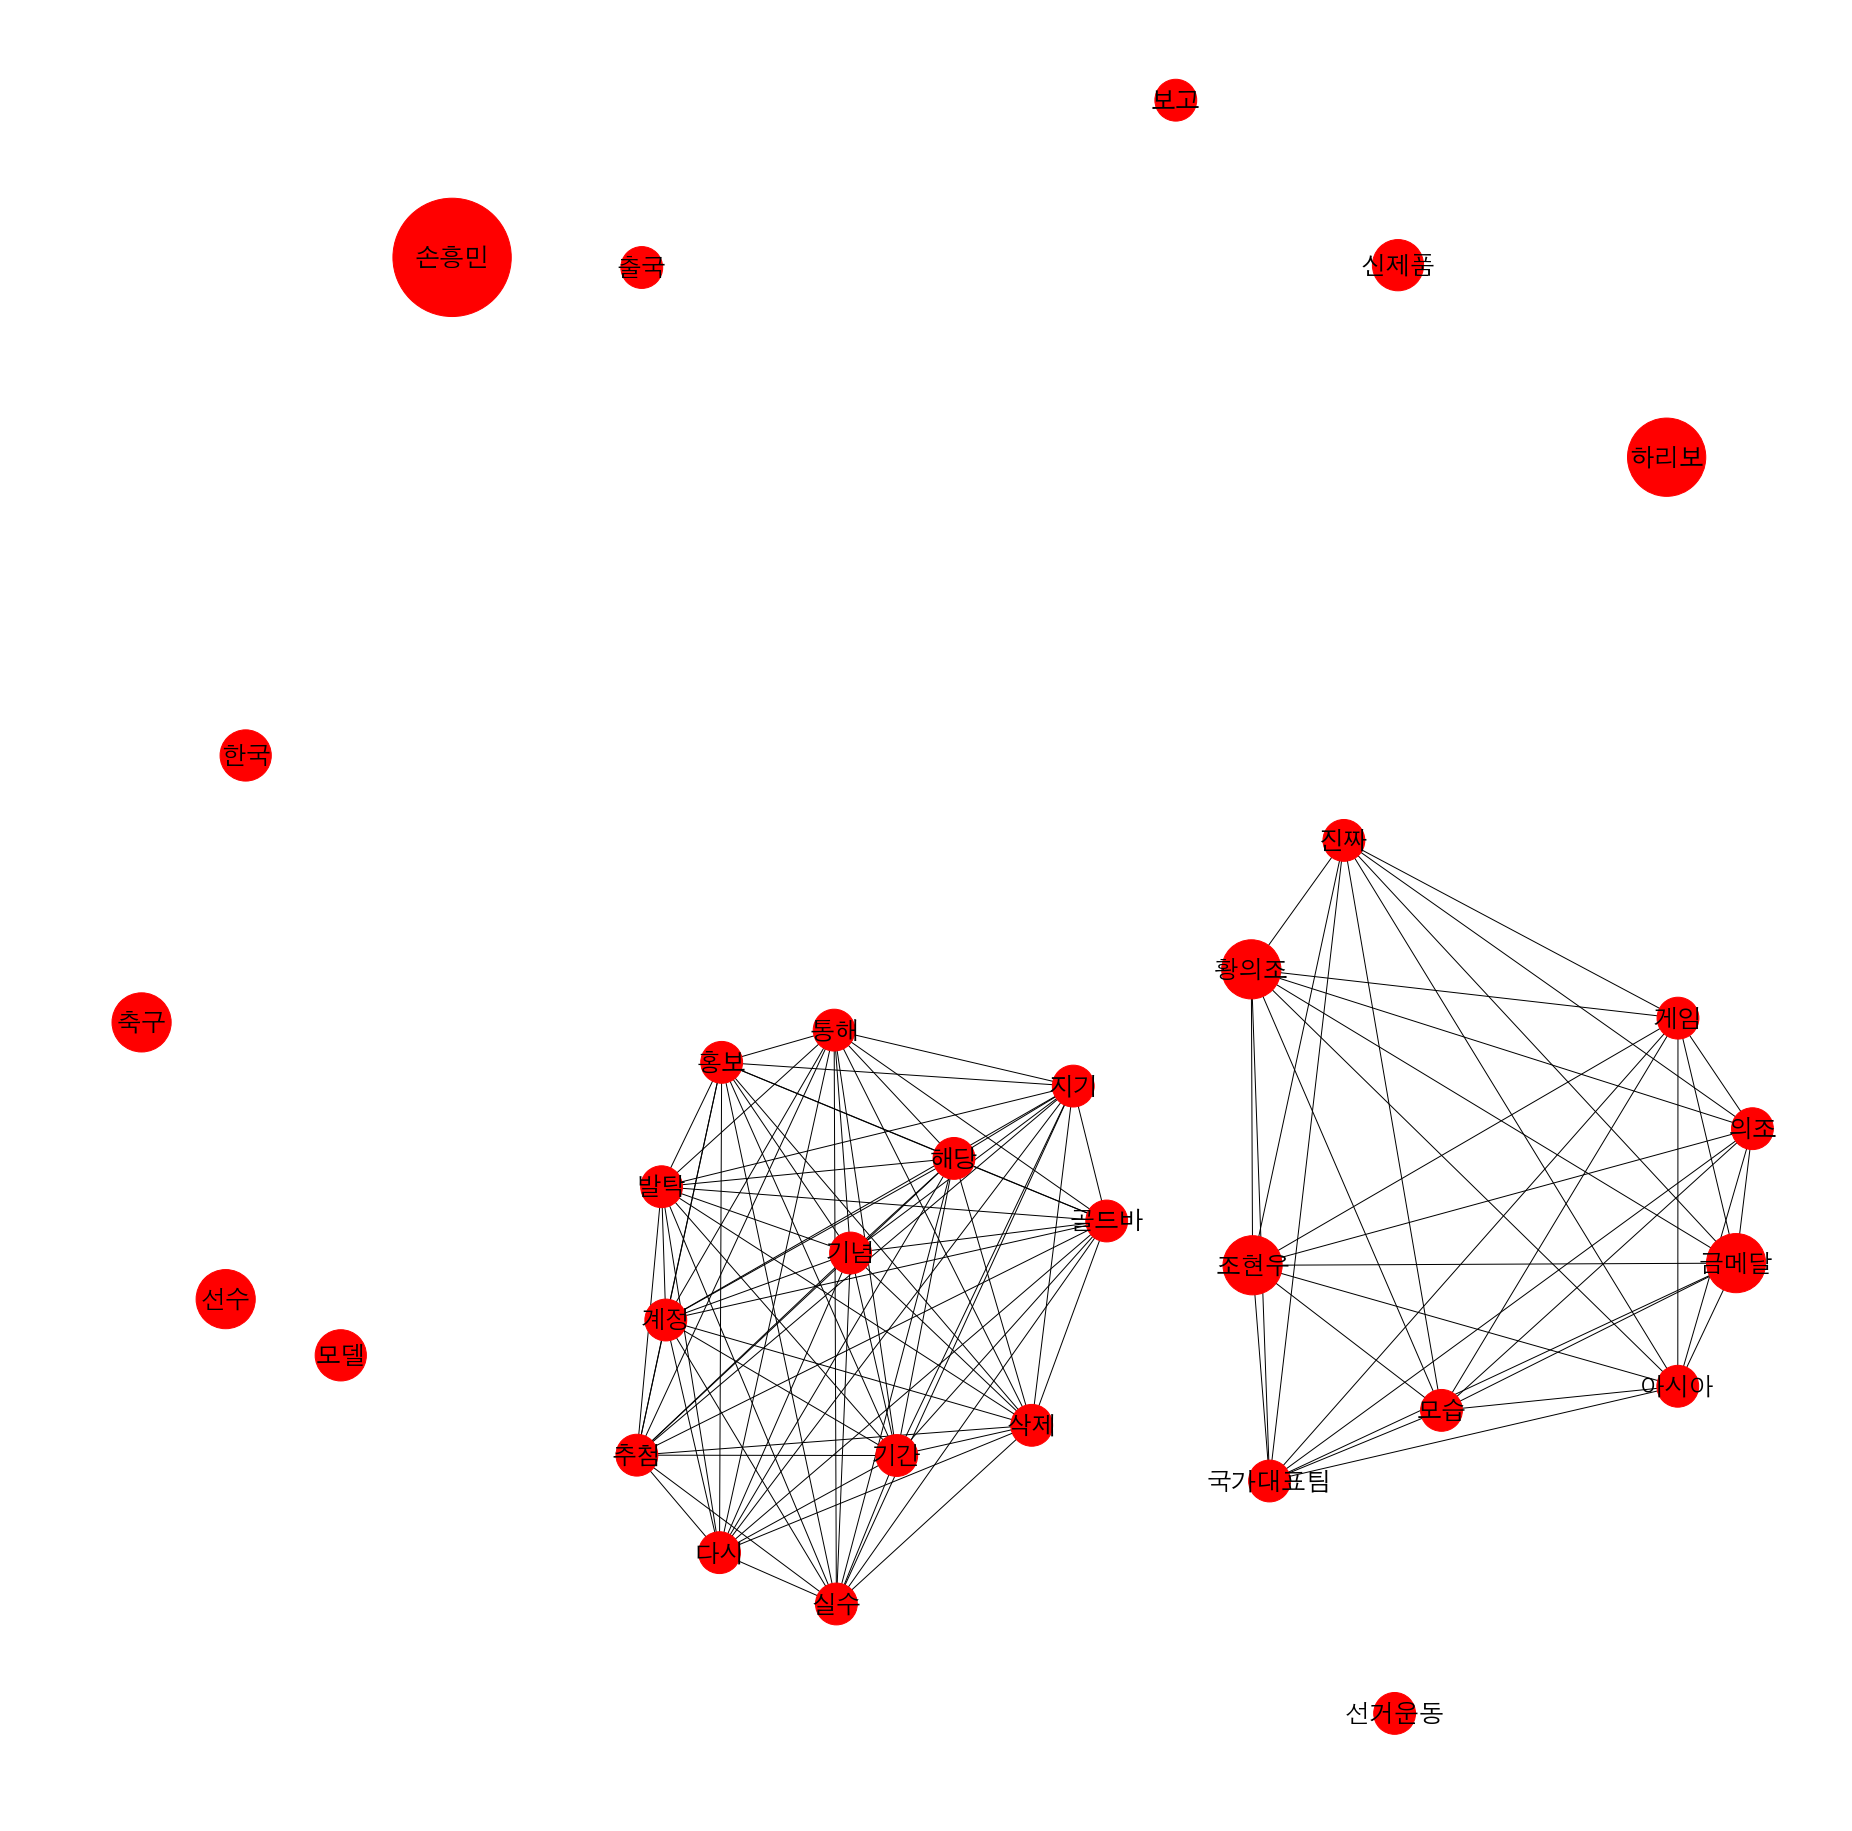

In [19]:
import networkx as nx
plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력합니다.
nx.draw_networkx_labels(G, pos=pos, font_family='AppleGothic', font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()